# ESCUELA POLITÉCNICA NACIONAL

![](logoEpn.jpg){width=3cm height=3cm fig-align="center"}

# TAREA N°9 Ejercicios Unidad 04 A-B Eliminación Gaussiana vs. Gauss-Jordan

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def eliminacion_gaussiana(A):
    A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1] - 1, "La matriz debe ser n x (n+1)"
    n = A.shape[0]

    for i in range(n - 1):

        # Buscar pivote
        p = None
        for pi in range(i, n):
            if A[pi, i] != 0:
                if p is None or abs(A[pi, i]) < abs(A[p, i]):
                    p = pi

        if p is None:
            raise ValueError("No existe solución única.")

        if p != i:
            A[[i, p]] = A[[p, i]]

        # Eliminación
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] -= m * A[i, i:]

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

    # Sustitución hacia atrás
    x = np.zeros(n)
    x[-1] = A[-1, -1] / A[-1, -2]

    for i in range(n - 2, -1, -1):
        suma = sum(A[i, j] * x[j] for j in range(i + 1, n))
        x[i] = (A[i, -1] - suma) / A[i, i]

    return x

### 1. Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos. Explique los resultados desde un punto de vista geométrico.

a. $x_1 + 2x_2 = 0$  
   $x_1 - x_2 = 0$

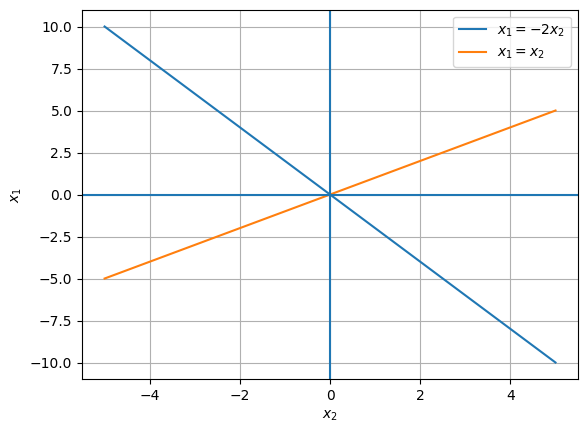

In [3]:
x2 = np.linspace(-5, 5, 100)

x1_eq1 = -2 * x2     # x1 + 2x2 = 0
x1_eq2 = x2          # x1 - x2 = 0

plt.plot(x2, x1_eq1, label=r"$x_1 = -2x_2$")
plt.plot(x2, x1_eq2, label=r"$x_1 = x_2$")

plt.axhline(0)
plt.axvline(0)
plt.xlabel("$x_2$")
plt.ylabel("$x_1$")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
Ab = [
    [1,  2,  0],
    [1, -1,  0]
]

eliminacion_gaussiana(Ab)

array([ 0., -0.])

**Interpretación geométrica:**

Ambas se intersectan únicamente en el origen, que es la **solución única** del sistema.

b. $x_1 + 2x_2 = 3$  
   $-2x_1 - 4x_2 = 6$

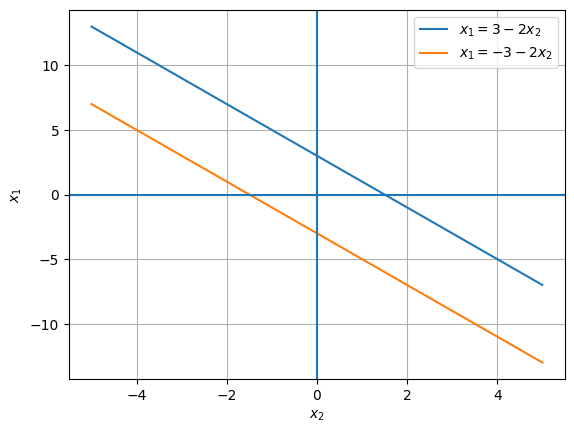

In [5]:
x2 = np.linspace(-5, 5, 100)

x1_eq1 = 3 - 2 * x2      # x1 + 2x2 = 3
x1_eq2 = -3 - 2 * x2     # -2x1 - 4x2 = 6

plt.plot(x2, x1_eq1, label=r"$x_1 = 3 - 2x_2$")
plt.plot(x2, x1_eq2, label=r"$x_1 = -3 - 2x_2$")

plt.axhline(0)
plt.axvline(0)
plt.xlabel("$x_2$")
plt.ylabel("$x_1$")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
Ab = [
    [1,  2,  3],
    [-2, -4,  6]
]
eliminacion_gaussiana(Ab)


ValueError: No existe solución única.

**Interpretación geométrica:**

Ambas ecuaciones representan rectas con la misma pendiente $(-2)$,
pero con distintos términos independientes. lLs rectas son paralelas y no se intersectan. El sistema **no tiene solución**.

c. $2x_1 + x_2 = -1$  
   $x_1 + x_2 = 2$  
   $x_1 - 3x_2 = 5$

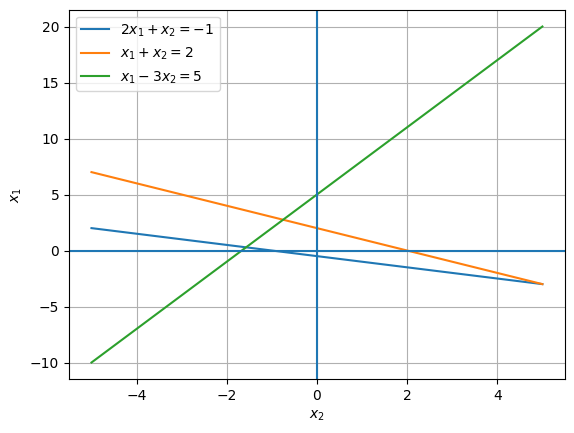

In [7]:
x2 = np.linspace(-5, 5, 100)

x1_eq1 = -1 - x2          # 2x1 + x2 = -1  → x1 = (-1 - x2)/2
x1_eq1 = (-1 - x2) / 2

x1_eq2 = 2 - x2           # x1 + x2 = 2

x1_eq3 = 5 + 3 * x2       # x1 - 3x2 = 5

plt.plot(x2, x1_eq1, label=r"$2x_1 + x_2 = -1$")
plt.plot(x2, x1_eq2, label=r"$x_1 + x_2 = 2$")
plt.plot(x2, x1_eq3, label=r"$x_1 - 3x_2 = 5$")

plt.axhline(0)
plt.axvline(0)
plt.xlabel("$x_2$")
plt.ylabel("$x_1$")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
Ab = [
    [2, 1, -1, -1],
    [1, 1,  1,  2],
    [1, -3, 2,  5]
]
eliminacion_gaussiana(Ab)

array([ 0.53846154, -0.30769231,  1.76923077])

**Interpretación geométrica:**

Las tres rectas no se intersectan en un mismo punto. Aunque dos de ellas se cruzan, la tercera no pasa por ese punto de intersección. El sistema es incompatible y **no tiene solución**.

d. $2x_1 + x_2 + x_3 = 1$  
   $2x_1 + 4x_2 - x_3 = -1$

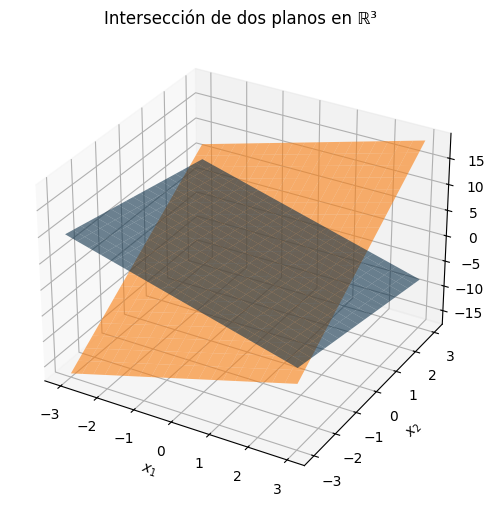

In [10]:
from mpl_toolkits.mplot3d import Axes3D
x1 = np.linspace(-3, 3, 20)
x2 = np.linspace(-3, 3, 20)
X1, X2 = np.meshgrid(x1, x2)

# Despejar x3 de cada ecuación
# 2x1 + x2 + x3 = 1  -> x3 = 1 - 2x1 - x2
X3_plane1 = 1 - 2*X1 - X2

# 2x1 + 4x2 - x3 = -1 -> x3 = 2x1 + 4x2 + 1
X3_plane2 = 2*X1 + 4*X2 + 1

# Crear figura 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, X3_plane1, alpha=0.6)
ax.plot_surface(X1, X2, X3_plane2, alpha=0.6)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.set_title("Intersección de dos planos en ℝ³")

plt.show()


In [9]:
Ab_d = [
    [2, 1,  1,  1],
    [2, 4, -1, -1]
]
eliminacion_gaussiana(Ab)

array([ 0.53846154, -0.30769231,  1.76923077])

**Interpretación geométrica:**
Dos ecuaciones en tres incógnitas representan dos planos en $𝑅^3$. La intersección de esos planos es una recta. El sistema tiene **infinitas soluciones**

### 2. Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver los siguientes sistemas lineales. No reordene las ecuaciones. (La solución exacta para cada sistema es $𝑥_1=−1,𝑥_2=2,𝑥_3=3.)

In [ ]:
import numpy as np

def gauss_redondeo(Ab, dig=2):
    """
    Resuelve un sistema lineal usando eliminación gaussiana con redondeo a `dig` dígitos
    y sustitución hacia atrás.

    Parameters:
    -----------
    Ab : np.ndarray
        Matriz aumentada del sistema de tamaño n x (n+1)
    dig : int
        Número de dígitos para redondeo en cada operación

    Returns:
    --------
    x : np.ndarray
        Vector solución aproximada
    A_esc : np.ndarray
        Matriz escalonada final
    """

    A = Ab.copy().astype(float)
    n = A.shape[0]

    # --- Eliminación hacia adelante con redondeo
    for i in range(n-1):
        for j in range(i+1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]
            A = np.round(A, dig)

    # --- Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        suma = sum(A[i, j] * x[j] for j in range(i+1, n))
        x[i] = (A[i, -1] - suma) / A[i, i]
        x[i] = round(x[i], dig)

    return x, A

a. $-x_1 + 4x_2 + x_3 = 8$  
   $\tfrac{5}{3}x_1 + \tfrac{2}{3}x_2 + \tfrac{2}{3}x_3 = 1$  
   $2x_1 + x_2 + 4x_3 = 11$

In [21]:
Ab_a = np.array([
    [-1, 4, 1, 8],
    [5/3, 2/3, 2/3, 1],
    [2, 1, 4, 11]
], dtype=float)

sol_a, escalonada_a = gauss_redondeo(Ab_a, dig=2)

print("Matriz escalonada final:")
print(escalonada_a)

print("\nSolución aproximada con 2 dígitos:")
print(sol_a)


Matriz escalonada final:
[[-1.    4.    1.    8.  ]
 [ 0.    7.33  2.33 14.33]
 [ 0.    0.    3.14  9.41]]

Solución aproximada con 2 dígitos:
[-1.  1.  3.]


b. $4x_1 + 2x_2 - x_3 = -5$  
   $\tfrac{1}{9}x_1 + \tfrac{1}{9}x_2 - \tfrac{1}{3}x_3 = -1$  
   $x_1 + 4x_2 + 2x_3 = 9$

In [22]:
Ab_b = np.array([
    [4, 2, -1, -5],
    [1/9, 1/9, -1/3, -1],
    [1, 4, 2, 9]
], dtype=float)

sol_b, escalonada_b = gauss_redondeo(Ab_b, dig=2)

print("Matriz escalonada final:")
print(escalonada_b)

print("\nSolución aproximada con 2 dígitos:")
print(sol_b)

Matriz escalonada final:
[[ 4.000e+00  2.000e+00 -1.000e+00 -5.000e+00]
 [ 0.000e+00  6.000e-02 -3.100e-01 -8.600e-01]
 [ 0.000e+00  0.000e+00  2.033e+01  6.042e+01]]

Solución aproximada con 2 dígitos:
[-1.01  1.01  2.97]


### 3 Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y determine si se necesitan intercambios de fila:

In [25]:
import numpy as np

def gauss_con_swaps(Ab):
    """
    Realiza eliminación gaussiana con registro de swaps, clasificación del sistema
    y resolución si es posible.
    
    Parameters:
    -----------
    Ab : np.ndarray
        Matriz aumentada del sistema (n x n+1)
        
    Returns:
    --------
    resultado : dict
        {
            'swaps': lista de tuplas de intercambios,
            'tipo': 'solucion_unica' / 'infinitas_soluciones' / 'sin_solucion',
            'solucion': vector solución si hay,
            'A_escalonada': matriz escalonada final
        }
    """
    A = Ab.copy().astype(float)
    n = A.shape[0]
    swaps = []

    # --- Eliminación hacia adelante con registro de swaps
    for i in range(n-1):
        # pivote: fila con mayor valor absoluto
        p = i
        for pi in range(i, n):
            if abs(A[pi, i]) > abs(A[p, i]):
                p = pi
        if p != i:
            swaps.append((i, p))
            A[[i, p]] = A[[p, i]]
        
        # Eliminación
        if A[i, i] == 0:  # pivote 0 → no se puede continuar
            continue
        for j in range(i+1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] -= m * A[i, i:]

    # --- Clasificación del sistema
    tipo = "solucion_unica"
    for i in range(n):
        if all(np.isclose(A[i, :-1], 0)) and not np.isclose(A[i, -1], 0):
            tipo = "sin_solucion"
            break
        if all(np.isclose(A[i, :-1], 0)) and np.isclose(A[i, -1], 0):
            tipo = "infinitas_soluciones"
            # no break, revisa todas filas
    
    # --- Sustitución hacia atrás si hay solución única
    solucion = None
    if tipo == "solucion_unica":
        x = np.zeros(n)
        for i in range(n-1, -1, -1):
            suma = sum(A[i, j]*x[j] for j in range(i+1, n))
            x[i] = (A[i, -1] - suma) / A[i, i]
        solucion = x

    return {
        "swaps": swaps,
        "tipo": tipo,
        "solucion": solucion,
        "A_escalonada": A
    }

a. $x_1 - x_2 + 3x_3 = 2$  
   $3x_1 - 3x_2 + x_3 = -1$  
   $x_1 + x_2 = 3$

In [26]:
Ab_3a = np.array([
    [1, -1, 3, 2],
    [3, -3, 1, -1],
    [1,  1, 0, 3]
], dtype=float)

res_3a = gauss_con_swaps(Ab_3a)
print("Literal a")
print("Swaps:", res_3a["swaps"])
print("Tipo:", res_3a["tipo"])
print("Solución:", res_3a["solucion"])
print("Matriz escalonada:\n", res_3a["A_escalonada"])

Literal a
Swaps: [(0, 1), (1, 2)]
Tipo: solucion_unica
Solución: [1.1875 1.8125 0.875 ]
Matriz escalonada:
 [[ 3.         -3.          1.         -1.        ]
 [ 0.          2.         -0.33333333  3.33333333]
 [ 0.          0.          2.66666667  2.33333333]]


b. $2x_1 - 1.5x_2 + 3x_3 = 1$  
   $-x_1 + 2x_3 = 3$  
   $4x_1 - 4.5x_2 + 5x_3 = 1$

In [27]:
# Literal 3(b)
Ab_3b = np.array([
    [2, -1.5, 3, 1],
    [-1, 0, 2, 3],
    [4, -4.5, 5, 1]
], dtype=float)

res_3b = gauss_con_swaps(Ab_3b)

print("Literal 3(b)")
print("Swaps necesarios:", res_3b["swaps"])
print("Tipo de sistema:", res_3b["tipo"])
print("Solución (si existe):", res_3b["solucion"])
print("Matriz escalonada final:\n", res_3b["A_escalonada"])

Literal 3(b)
Swaps necesarios: [(0, 2)]
Tipo de sistema: solucion_unica
Solución (si existe): [-1. -0.  1.]
Matriz escalonada final:
 [[ 4.         -4.5         5.          1.        ]
 [ 0.         -1.125       3.25        3.25      ]
 [ 0.          0.          2.66666667  2.66666667]]


c. $2x_1 = 3$
   $x_1 + 1.5x_2 = 4.5$  
   $-3x_2 + 0.5x_3 = -6.6$  
   $2x_1 - 2x_2 + x_3 + x_4 = 0.8$

In [28]:
# Literal 3(c)
Ab_3c = np.array([
    [2, 0, 0, 0, 3],
    [1, 1.5, 0, 0, 4.5],
    [0, -3, 0.5, 0, -6.6],
    [2, -2, 1, 1, 0.8]
], dtype=float)

res_3c = gauss_con_swaps(Ab_3c)

print("Literal 3(c)")
print("Swaps necesarios:", res_3c["swaps"])
print("Tipo de sistema:", res_3c["tipo"])
print("Solución (si existe):", res_3c["solucion"])
print("Matriz escalonada final:\n", res_3c["A_escalonada"])

Literal 3(c)
Swaps necesarios: [(1, 2), (2, 3)]
Tipo de sistema: solucion_unica
Solución (si existe): [ 1.5  2.  -1.2  3. ]
Matriz escalonada final:
 [[ 2.          0.          0.          0.          3.        ]
 [ 0.         -3.          0.5         0.         -6.6       ]
 [ 0.          0.          0.66666667  1.          2.2       ]
 [ 0.          0.          0.         -0.375      -1.125     ]]


d. $x_1 + x_2 + x_4 = 2$  
   $2x_1 + x_2 - x_3 + x_4 = 1$  
   $4x_1 - x_2 - 2x_3 + 2x_4 = 0$  
   $3x_1 - x_2 - x_3 + 2x_4 = -3$

In [29]:
# Literal 3(d)
Ab_3d = np.array([
    [1, 1, 0, 1, 2],
    [2, 1, -1, 1, 1],
    [4, -1, -2, 2, 0],
    [3, -1, -1, 2, -3]
], dtype=float)

res_3d = gauss_con_swaps(Ab_3d)

print("Literal 3(d)")
print("Swaps necesarios:", res_3d["swaps"])
print("Tipo de sistema:", res_3d["tipo"])
print("Solución (si existe):", res_3d["solucion"])
print("Matriz escalonada final:\n", res_3d["A_escalonada"])

Literal 3(d)
Swaps necesarios: [(0, 2)]
Tipo de sistema: sin_solucion
Solución (si existe): None
Matriz escalonada final:
 [[ 4.         -1.         -2.          2.          0.        ]
 [ 0.          1.5         0.          0.          1.        ]
 [ 0.          0.          0.5         0.5         1.16666667]
 [ 0.          0.          0.          0.         -4.        ]]


### 4. Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los siguientes sistemas lineales.

In [30]:
def gauss_float32(Ab):
    """
    Eliminación gaussiana con precisión de 32 bits,
    registro de swaps, clasificación del sistema y resolución si es posible.
    """
    A = Ab.copy().astype(np.float32)
    n = A.shape[0]
    swaps = []

    # Eliminación hacia adelante con swaps
    for i in range(n-1):
        # Pivote máximo absoluto
        p = i
        for pi in range(i, n):
            if abs(A[pi, i]) > abs(A[p, i]):
                p = pi
        if p != i:
            swaps.append((i, p))
            A[[i, p]] = A[[p, i]]
        
        # Eliminación
        if A[i, i] == 0:
            continue
        for j in range(i+1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] -= m * A[i, i:]

    # Clasificación del sistema
    tipo = "solucion_unica"
    for i in range(n):
        if all(np.isclose(A[i, :-1], 0, atol=1e-6)) and not np.isclose(A[i, -1], 0, atol=1e-6):
            tipo = "sin_solucion"
            break
        if all(np.isclose(A[i, :-1], 0, atol=1e-6)) and np.isclose(A[i, -1], 0, atol=1e-6):
            tipo = "infinitas_soluciones"

    # Sustitución hacia atrás si solución única
    solucion = None
    if tipo == "solucion_unica":
        x = np.zeros(n, dtype=np.float32)
        for i in range(n-1, -1, -1):
            suma = sum(A[i, j]*x[j] for j in range(i+1, n))
            x[i] = (A[i, -1] - suma) / A[i, i]
        solucion = x

    return {
        "swaps": swaps,
        "tipo": tipo,
        "solucion": solucion,
        "A_escalonada": A
    }

a. $\tfrac{1}{4}x_1 + \tfrac{1}{5}x_2 + \tfrac{1}{6}x_3 = 9$  
$\tfrac{1}{3}x_1 + \tfrac{1}{4}x_2 + \tfrac{1}{5}x_3 = 8$  
$\tfrac{1}{2}x_1 + x_2 + 2x_3 = 8$

In [31]:
# Literal 4(a) - precisión 32 bits
Ab_4a = np.array([
    [1/4, 1/5, 1/6, 9],
    [1/3, 1/4, 1/5, 8],
    [1/2, 1,   2,   8]
], dtype=np.float32)

res_4a = gauss_float32(Ab_4a)

print("Literal 4(a)")
print("Swaps necesarios:", res_4a["swaps"])
print("Tipo de sistema:", res_4a["tipo"])
print("Solución (si existe):", res_4a["solucion"])
print("Matriz escalonada final:\n", res_4a["A_escalonada"])

Literal 4(a)
Swaps necesarios: [(0, 2)]
Tipo de sistema: solucion_unica
Solución (si existe): [-227.07697  476.92322 -177.69237]
Matriz escalonada final:
 [[ 0.5         1.          2.          8.        ]
 [ 0.         -0.4166667  -1.1333333   2.6666665 ]
 [ 0.          0.         -0.01733333  3.0800002 ]]


b. $3.333x_1 + 15920x_2 - 10.333x_3 = 15913$  
$2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544$  
$1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254$

In [32]:
# Literal 4(b) - precisión 32 bits
Ab_4b = np.array([
    [3.333, 15920, -10.333, 15913],
    [2.222, 16.71,  9.612,  28.544],
    [1.5611, 5.1791, 1.6852, 8.4254]
], dtype=np.float32)

res_4b = gauss_float32(Ab_4b)

print("Literal 4(b)")
print("Swaps necesarios:", res_4b["swaps"])
print("Tipo de sistema:", res_4b["tipo"])
print("Solución (si existe):", res_4b["solucion"])
print("Matriz escalonada final:\n", res_4b["A_escalonada"])

Literal 4(b)
Swaps necesarios: []
Tipo de sistema: solucion_unica
Solución (si existe): [0.99970937 1.0000001  1.0001061 ]
Matriz escalonada final:
 [[ 3.3329999e+00  1.5920000e+04 -1.0333000e+01  1.5913000e+04]
 [ 0.0000000e+00 -1.0596623e+04  1.6500668e+01 -1.0580122e+04]
 [ 0.0000000e+00  0.0000000e+00 -5.0780745e+00 -5.0786133e+00]]


c. $x_1 + \tfrac{1}{2}x_2 + \tfrac{1}{3}x_3 + \tfrac{1}{4}x_4 = \tfrac{1}{6}$  
$\tfrac{1}{2}x_1 + \tfrac{1}{3}x_2 + \tfrac{1}{4}x_3 + \tfrac{1}{5}x_4 = \tfrac{1}{7}$  
$\tfrac{1}{3}x_1 + \tfrac{1}{4}x_2 + \tfrac{1}{5}x_3 + \tfrac{1}{6}x_4 = \tfrac{1}{8}$  
$\tfrac{1}{4}x_1 + \tfrac{1}{5}x_2 + \tfrac{1}{6}x_3 + \tfrac{1}{7}x_4 = \tfrac{1}{9}$

In [33]:
# Literal 4(c)
Ab_4c = np.array([
    [1, 1/2, 1/3, 1/4, 1/6],
    [1/2, 1/3, 1/4, 1/5, 1/7],
    [1/3, 1/4, 1/5, 1/6, 1/8],
    [1/4, 1/5, 1/6, 1/7, 1/9]
], dtype=np.float32)

res_4c = gauss_float32(Ab_4c)

print("Literal 4(c)")
print("Swaps necesarios:", res_4c["swaps"])
print("Tipo de sistema:", res_4c["tipo"])
print("Solución (si existe):", res_4c["solucion"])
print("Matriz escalonada final:\n", res_4c["A_escalonada"])

Literal 4(c)
Swaps necesarios: [(2, 3)]
Tipo de sistema: solucion_unica
Solución (si existe): [-0.03174745  0.59525675 -2.3809996   2.7778091 ]
Matriz escalonada final:
 [[ 1.0000000e+00  5.0000000e-01  3.3333334e-01  2.5000000e-01
   1.6666667e-01]
 [ 0.0000000e+00  8.3333343e-02  8.3333328e-02  7.5000003e-02
   5.9523813e-02]
 [ 0.0000000e+00  0.0000000e+00  8.3333477e-03  1.2857154e-02
   1.5873022e-02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -2.3809634e-04
  -6.6138618e-04]]


d. $2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7$  
$x_1 + 2x_3 - x_4 + x_5 = 2$  
$-2x_2 - x_3 + x_4 - x_5 = -5$  
$3x_1 + x_2 - 4x_3 + 5x_5 = 6$  
$x_1 - x_2 - x_3 - x_4 + x_5 = -3$

In [34]:
# Literal 4(d)
Ab_4d = np.array([
    [2, 1, -1, 1, -3, 7],
    [1, 0, 2, -1, 1, 2],
    [0, -2, -1, 1, -1, -5],
    [3, 1, -4, 0, 5, 6],
    [1, -1, -1, -1, 1, -3]
], dtype=np.float32)

res_4d = gauss_float32(Ab_4d)

print("Literal 4(d)")
print("Swaps necesarios:", res_4d["swaps"])
print("Tipo de sistema:", res_4d["tipo"])
print("Solución (si existe):", res_4d["solucion"])
print("Matriz escalonada final:\n", res_4d["A_escalonada"])

Literal 4(d)
Swaps necesarios: [(0, 3), (1, 2)]
Tipo de sistema: solucion_unica
Solución (si existe): [1.8830409  2.8070176  0.730994   1.4385961  0.09356716]
Matriz escalonada final:
 [[ 3.          1.         -4.          0.          5.          6.        ]
 [ 0.         -2.         -1.          1.         -1.         -5.        ]
 [ 0.          0.          3.5000002  -1.1666666  -0.50000006  0.8333334 ]
 [ 0.          0.          0.          1.6666666  -6.285714    1.8095238 ]
 [ 0.          0.          0.          0.         -4.885715   -0.45714247]]


### 5. Dado el sistema lineal:

$x_1 - x_2 + \alpha x_3 = -2$  
$-x_1 + 2x_2 - \alpha x_3 = 3$  
$\alpha x_1 + x_2 + x_3 = 2$


    a. Encuentre el valor(es) de 𝛼 para los que el sistema no tiene soluciones.
    
    

In [38]:
import numpy as np

def sin_solucion():
    A = lambda alpha: np.array([
        [1, -1, alpha],
        [-1, 2, -alpha],
        [alpha, 1, 1]
    ], dtype=float)
    b = np.array([-2, 3, 2], dtype=float)

    valores = []
    for alpha in range(-10, 11):
        rango_A = np.linalg.matrix_rank(A(alpha))
        rango_Ab = np.linalg.matrix_rank(np.column_stack([A(alpha), b]))
        if rango_A < rango_Ab:
            valores.append(alpha)
    return valores

print("a) Valores de alpha sin solución:", sin_solucion())

a) Valores de alpha sin solución: [1]


b. Encuentre el valor(es) de 𝛼 para los que el sistema tiene un número infinito de soluciones.

In [39]:
def infinitas_soluciones():
    A = lambda alpha: np.array([
        [1, -1, alpha],
        [-1, 2, -alpha],
        [alpha, 1, 1]
    ], dtype=float)
    b = np.array([-2, 3, 2], dtype=float)

    valores = []
    for alpha in range(-10, 11):
        rango_A = np.linalg.matrix_rank(A(alpha))
        rango_Ab = np.linalg.matrix_rank(np.column_stack([A(alpha), b]))
        if rango_A == rango_Ab and rango_A < A(alpha).shape[1]:
            valores.append(alpha)
    return valores

print("b) Valores de alpha con infinitas soluciones:", infinitas_soluciones())

b) Valores de alpha con infinitas soluciones: [-1]


c. Suponga que existe una única solución para una a determinada, encuentre la solución

In [40]:
def unica_solucion(alpha):
    A = np.array([
        [1, -1, alpha],
        [-1, 2, -alpha],
        [alpha, 1, 1]
    ], dtype=float)
    b = np.array([-2, 3, 2], dtype=float)

    sol = np.linalg.solve(A, b)
    return sol

# Ejemplo: alpha = 2
alpha = 2
print(f"c) Solución única para alpha={alpha}:", unica_solucion(alpha))

c) Solución única para alpha=2: [ 1.  1. -1.]


### 6. Suponga que en un sistema biológico existen n especies de animales y m fuentes de alimento. Si 𝑥_𝑗 representa la población de las j-ésimas especies, para cada $𝑗=1,⋯,𝑛; 𝑏_𝑖;$ representa el suministro diario disponible del i-ésimo alimento y $𝑎_{𝑖𝑗}$ representa la cantidad del i-ésimo alimento.

$a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n = b_1$  

$a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n = b_2$  

$\vdots$  

$a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n = b_m$

representa un equilibrio donde existe un suministro diario de alimento para cumplir con precisión con el promedio diario de consumo de cada especie.
a. Si

$$ 
A = [a_{ij}] =
\begin{bmatrix}
1 & 2 & 0 & 1 \\
0 & 2 & 0 & 0 \\
1 & 3 & 2 & 1
\end{bmatrix}
$$

$𝐱=(𝑥𝑗)=[1000,500,350,400]$, y $𝐛=(𝑏𝑖)=[3500,2700,900]$. ¿Existe suficiente alimento para satisfacer el consumo promedio diario?

In [41]:
import numpy as np

# Datos
A = np.array([
    [1, 2, 0, 1],
    [0, 2, 0, 0],
    [1, 3, 2, 1]
], dtype=float)

x = np.array([1000, 500, 350, 400], dtype=float)
b = np.array([3500, 2700, 900], dtype=float)

# Verificar si el suministro satisface el consumo
b_calculado = A @ x
print("b calculado:", b_calculado)
print("b original:  ", b)

if np.allclose(b_calculado, b):
    print("✅ Suficiente alimento para satisfacer el consumo promedio diario")
else:
    print("❌ No hay suficiente alimento para satisfacer el consumo promedio diario")

b calculado: [2400. 1000. 3600.]
b original:   [3500. 2700.  900.]
❌ No hay suficiente alimento para satisfacer el consumo promedio diario


b. ¿Cuál es el número máximo de animales de cada especie que se podría agregar de forma individual al sistema con el suministro de alimento que cumpla con el consumo?

In [42]:
# Máximo incremento individual por especie
delta_max = []

for j in range(A.shape[1]):
    increments = []
    for i in range(A.shape[0]):
        if A[i,j] > 0:
            increments.append((b[i] - b_calculado[i]) / A[i,j])
    # Si no hay restricción (columna cero), ponemos infinito
    delta_max.append(min(increments) if increments else np.inf)

print("Máximo incremento individual de cada especie:", delta_max)

Máximo incremento individual de cada especie: [np.float64(-2700.0), np.float64(-900.0), np.float64(-1350.0), np.float64(-2700.0)]


c. Si la especie 1 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

In [43]:
# Especie 1 se extingue
x1_actual = x[0]
b_restante = b - b_calculado + A[:,0]*x1_actual

# Sistema reducido sin especie 1
A_rest = A[:, 1:]

# Máximo incremento individual de las especies restantes
delta_rest1 = []
for j in range(A_rest.shape[1]):
    increments = []
    for i in range(A_rest.shape[0]):
        if A_rest[i,j] > 0:
            increments.append(b_restante[i] / A_rest[i,j])
    delta_rest1.append(min(increments) if increments else np.inf)

print("Máximo incremento individual si especie 1 se extingue:", delta_rest1)

Máximo incremento individual si especie 1 se extingue: [np.float64(-566.6666666666666), np.float64(-850.0), np.float64(-1700.0)]


d. Si la especie 2 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

In [44]:
# Especie 2 se extingue
x2_actual = x[1]
b_restante2 = b - b_calculado + A[:,1]*x2_actual

# Sistema reducido sin especie 2
A_rest2 = np.delete(A, 1, axis=1)  # eliminamos columna de especie 2

# Máximo incremento individual de las especies restantes
delta_rest2 = []
for j in range(A_rest2.shape[1]):
    increments = []
    for i in range(A_rest2.shape[0]):
        if A_rest2[i,j] > 0:
            increments.append(b_restante2[i] / A_rest2[i,j])
    delta_rest2.append(min(increments) if increments else np.inf)

print("Máximo incremento individual si especie 2 se extingue:", delta_rest2)

Máximo incremento individual si especie 2 se extingue: [np.float64(-1200.0), np.float64(-600.0), np.float64(-1200.0)]


### 7. Repita el ejercicio 4 con el método Gauss-Jordan.

In [45]:
import numpy as np

def gauss_jordan_float32(Ab):
    """
    Resuelve un sistema lineal usando Gauss-Jordan (rref) con precisión float32.
    
    Retorna un diccionario con:
    - 'A_escalonada': matriz en forma reducida
    - 'solucion': vector de solución si existe única
    - 'tipo': 'solución única', 'infinitas soluciones', 'sin solución'
    """
    A = Ab.astype(np.float32).copy()
    m, n = A.shape
    n_vars = n - 1
    swaps = []

    for i in range(n_vars):
        # Buscar pivote
        pivot_row = i
        while pivot_row < m and A[pivot_row, i] == 0:
            pivot_row += 1
        if pivot_row == m:
            continue  # columna sin pivote
        if pivot_row != i:
            A[[i, pivot_row]] = A[[pivot_row, i]]
            swaps.append((i, pivot_row))
        
        # Normalizar fila pivote
        A[i] = A[i] / A[i,i]
        
        # Eliminar otras filas
        for j in range(m):
            if j != i:
                A[j] -= A[j,i]*A[i]
    
    # Determinar tipo de sistema
    rango_A = np.linalg.matrix_rank(A[:, :-1])
    rango_Ab = np.linalg.matrix_rank(A)
    
    if rango_A < rango_Ab:
        tipo = "sin solución"
        solucion = None
    elif rango_A < n_vars:
        tipo = "infinitas soluciones"
        solucion = None
    else:
        tipo = "solución única"
        solucion = A[:, -1]
    
    return {"A_escalonada": A, "solucion": solucion, "tipo": tipo, "swaps": swaps}

a. $\tfrac{1}{4}x_1 + \tfrac{1}{5}x_2 + \tfrac{1}{6}x_3 = 9$  
$\tfrac{1}{3}x_1 + \tfrac{1}{4}x_2 + \tfrac{1}{5}x_3 = 8$  
$\tfrac{1}{2}x_1 + x_2 + 2x_3 = 8$

In [47]:
Ab_4a = np.array([
    [1/4, 1/5, 1/6, 9],
    [1/3, 1/4, 1/5, 8],
    [1/2, 1, 2, 8]
], dtype=np.float32)

res_4a_gj = gauss_jordan_float32(Ab_4a)
print("4(a) Gauss-Jordan:", res_4a_gj["tipo"], res_4a_gj["solucion"])

4(a) Gauss-Jordan: solución única [-227.07668  476.9226  -177.69215]


b. $3.333x_1 + 15920x_2 - 10.333x_3 = 15913$  
$2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544$  
$1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254$

In [48]:
Ab_4b = np.array([
    [3.333, 15920, -10.333, 15913],
    [2.222, 16.71, 9.612, 28.544],
    [1.5611, 5.1791, 1.6852, 8.4254]
], dtype=np.float32)

res_4b_gj = gauss_jordan_float32(Ab_4b)
print("4(b) Gauss-Jordan:", res_4b_gj["tipo"], res_4b_gj["solucion"])

4(b) Gauss-Jordan: solución única [0.9998865 1.0000001 1.0001063]


c. $x_1 + \tfrac{1}{2}x_2 + \tfrac{1}{3}x_3 + \tfrac{1}{4}x_4 = \tfrac{1}{6}$  
$\tfrac{1}{2}x_1 + \tfrac{1}{3}x_2 + \tfrac{1}{4}x_3 + \tfrac{1}{5}x_4 = \tfrac{1}{7}$  
$\tfrac{1}{3}x_1 + \tfrac{1}{4}x_2 + \tfrac{1}{5}x_3 + \tfrac{1}{6}x_4 = \tfrac{1}{8}$  
$\tfrac{1}{4}x_1 + \tfrac{1}{5}x_2 + \tfrac{1}{6}x_3 + \tfrac{1}{7}x_4 = \tfrac{1}{9}$

In [49]:
Ab_4c = np.array([
    [1, 1/2, 1/3, 1/4, 1/6],
    [1/2, 1/3, 1/4, 1/5, 1/7],
    [1/3, 1/4, 1/5, 1/6, 1/8],
    [1/4, 1/5, 1/6, 1/7, 1/9]
], dtype=np.float32)

res_4c_gj = gauss_jordan_float32(Ab_4c)
print("4(c) Gauss-Jordan:", res_4c_gj["tipo"], res_4c_gj["solucion"])

4(c) Gauss-Jordan: solución única [-0.03174722  0.5952536  -2.380991    2.7778032 ]


d. $2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7$  
$x_1 + 2x_3 - x_4 + x_5 = 2$  
$-2x_2 - x_3 + x_4 - x_5 = -5$  
$3x_1 + x_2 - 4x_3 + 5x_5 = 6$  
$x_1 - x_2 - x_3 - x_4 + x_5 = -3$

In [50]:
Ab_4d = np.array([
    [2, 1, -1, 1, -3, 7],
    [1, 0, 2, -1, 1, 2],
    [0, -2, -1, 1, -1, -5],
    [3, 1, -4, 0, 5, 6],
    [1, -1, -1, -1, 1, -3]
], dtype=np.float32)

res_4d_gj = gauss_jordan_float32(Ab_4d)
print("4(d) Gauss-Jordan:", res_4d_gj["tipo"], res_4d_gj["solucion"])

4(d) Gauss-Jordan: solución única [1.8830409  2.8070173  0.73099416 1.4385965  0.09356724]


## Link del repositorio GitHub

[github_TamyBenavidez](https://github.com/TamyBenavidez/MN/tree/main/Tarea09), Tarea N°9